# Solução desafio Kaggle time series


### André Luiz Rosário
### Leonardo Emerson

In [16]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [17]:
holidays_events = pd.read_csv('./datasets/holidays_events.csv')
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [18]:
oil = pd.read_csv('./datasets/oil.csv')
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


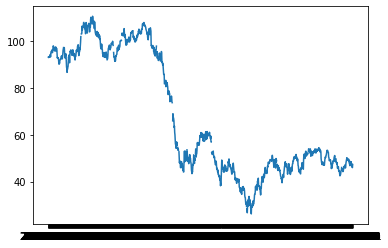

In [19]:
plt.plot(oil["date"], oil['dcoilwtico'])

In [20]:
sample_submission = pd.read_csv('./datasets/sample_submission.csv')
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [21]:
stores = pd.read_csv('./datasets/stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [22]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [23]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [24]:
transactions = pd.read_csv('./datasets/transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [25]:
# Tamanho dos datasets
print("Dimensão holidays_events: ", holidays_events.shape)
print("Dimensão oil: ", oil.shape)
print("Dimensão stores: ", stores.shape)
print("Dimensão test: ", test.shape)
print("Dimensão train: ", train.shape)
print("Dimensão transactions: ", transactions.shape)

Dimensão holidays_events:  (350, 6)
Dimensão oil:  (1218, 2)
Dimensão stores:  (54, 5)
Dimensão test:  (28512, 5)
Dimensão train:  (3000888, 6)
Dimensão transactions:  (83488, 3)


In [26]:
# Info dos datasets
print("###### holidays_events ######\n")
print(holidays_events.info(), "\n\n")
print("###### oil ######\n")
print(oil.info(), "\n\n")
print("###### stores ######\n")
print(stores.info(), "\n\n")
print("###### test ######\n")
print(test.info(), "\n\n")
print("###### train ######\n")
print(train.info(), "\n\n")
print("###### transactions ######\n")
print(transactions.info())

###### holidays_events ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None 


###### oil ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None 


###### stores ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   

In [27]:
#Preenchendo NaN no dataset oil pela média:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna((oil['dcoilwtico'].mean()))
oil['dcoilwtico']

0       67.714366
1       93.140000
2       92.970000
3       93.120000
4       93.200000
          ...    
1213    47.650000
1214    46.400000
1215    46.460000
1216    45.960000
1217    47.260000
Name: dcoilwtico, Length: 1218, dtype: float64

In [28]:
#CONVERSÕES DATASET TRAIN
train['date'] = train['date'].astype('datetime64')
train["mes_date"] = train['date'].dt.month
train['ano_date'] = train['date'].dt.year
train["dia_date"] = train['date'].dt.day
train['anomes'] = train['date'].dt.to_period('m')
train['anomes'] = train['anomes'].astype(str).str.replace('-', '')

#CONVERSÕES DATASET OIL
oil['date'] = oil['date'].astype('datetime64')
oil['dia_semana'] = oil['date'].dt.dayofweek
oil = oil.set_index('date')

#CONVERSÕES DATASET HOLIDAYS_EVENTS
holidays_events['date'] = holidays_events['date'].astype('datetime64')

###### Plotando quantidade de lojas por tipo de loja

Text(0, 0.5, 'Quantidade')

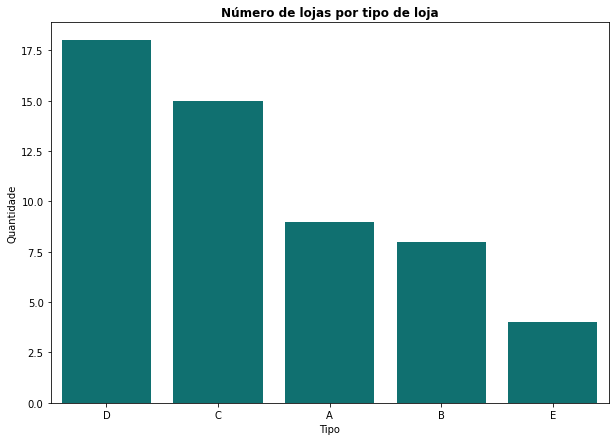

In [29]:
plt.figure(figsize=(10, 7))
sns.countplot(data=stores, x='type', order=stores.type.value_counts().index, color='teal')

plt.title('Número de lojas por tipo de loja',fontweight="bold")
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

Text(0.5, 0, 'Quantidade')

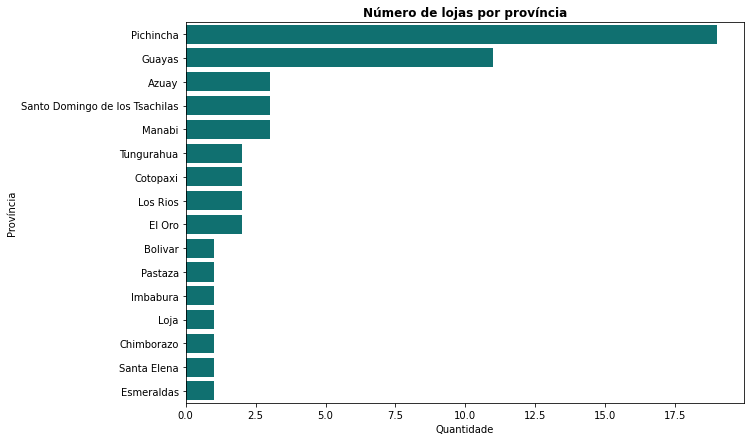

In [30]:
plt.figure(figsize=(10, 7))
sns.countplot(data=stores, y='state',order=stores.state.value_counts().index, color='teal')

plt.title('Número de lojas por província',fontweight="bold")
plt.ylabel('Província')
plt.xlabel('Quantidade')

In [32]:
#tirando coluna description

holidays_events.drop('description', axis = 1, inplace = True)

# tirando as linhas nas quais a coluna 'transferred' == True, ja que
#o feriado nao foi naquela data
for idx, val in holidays_events['transferred'].items():
    if val == True:
        holidays_events.drop(axis = 0, index = idx, inplace = True)

In [33]:
#mapeando clusters do dataset 

dict_cluster = {}
for idx, val in stores['store_nbr'].items():
    dict_cluster[str(val)] = stores.iloc[idx]['cluster']

### Aplicando modelos

<p> Inicialmente, foram escolhidos, para uma primeira análise, os modelos Random Forest e Redes Neurais, com o objetivo de comparar o desempenho e o resultado dos mesmos. Para isso, será utilizada a biblioteca sklearn</p>

In [38]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,mes_date,ano_date,dia_date,anomes
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,1,201301
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,1,201301
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,1,201301
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,1,201301
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,1,201301


In [40]:
#random forest
from sklearn.ensemble import RandomForestRegressor

In [41]:
#dividindo em dados de treino e teste:
from sklearn.model_selection import train_test_split

In [48]:
X = train.drop('sales', axis = 1)
y = train['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = None, shuffle = False)

In [51]:
rf = RandomForestRegressor()

In [53]:
rf.fit(X_train, y_train)

TypeError: invalid type promotion